#<font color='#6AA84F'>Imports</font>

In [1]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9016 sha256=182f690f3971e3227c0970f4ddd4def78273d502d65da987286d5f28453cf0c8
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom


In [2]:
import pandas as pd
import numpy as np 

#visualisation 
import matplotlib.pyplot as plt
import seaborn as sns 

# Neural network features
import sklearn
import keras
from minisom import MiniSom

from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize


# Import necessary modules
from math import sqrt
from time import clock
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report



#<font color='#6AA84F'>Section A(Importing datasets)</font>


## German Statlog Dataset

Data Set Information:<br>
This dataset classifies people described by a set of attributes as good or bad credit risks.
This dataset classifies people described by a set of attributes as good or bad credit risks.
<br>Two datasets are provided. the original dataset, in the form provided by Prof. Hofmann, contains categorical/symbolic attributes and is in the file *german.data*.

For algorithms that need numerical attributes, Strathclyde University produced the file *german.data-numeric* which we will be upload. This file has been edited and several indicator variables added to make it suitable for algorithms which cannot cope with categorical variables. This was the form used by StatLog.

In [3]:
german_num_df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric", delim_whitespace=True, header=None, engine='python')

# Numerical dataframe column names
column_str_num = "Status of existing checking account,Duration in month,Credit history,Credit amount,Savings account/bonds,Present employment since,Personal status and sex,Present residence since,Property,Age in years,Other installment plans,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Telephone,foreign worker,Purpose Car new,Purpose Car used,None other debtors / guarantors,Co-applicant,19,Housing,21,Job,23,Result"
column_list_num = column_str_num.split(',')

german_num_df.columns = column_list_num

### Attribute Information for dataset (german.data-numerical):


Attribute 1: (qualitative)

**Status of existing checking account**
+ 1 : ... < 0 DM
+ 2 : 0 <= ... < 200 DM
+ 3 : ... >= 200 DM / salary assignments for at least 1 year
+ 4 : no checking account

Attribute 2: (numerical)

**Duration in month**

Attribute 3: (qualitative)

**Credit history**
+ 0 : no credits taken/ all credits paid back duly
+ 1 : all credits at this bank paid back duly
+ 2 : existing credits paid back duly till now
+ 3 : delay in paying off in the past
+ 4 : critical account/ other credits existing (not at this bank)

Attribute 4: (numerical)
<br>**Credit amount**
<br> If credit amount in dataset is 12 then actual credit amount ~1200 (100*x)

Attibute 5: (qualitative)
<br>**Savings account/bonds**
+ 1 : ... < 100 DM
+ 2 : 100 <= ... < 500 DM
+ 3 : 500 <= ... < 1000 DM
+ 4 : .. >= 1000 DM
+ 5 : unknown/ no savings account

Attribute 6: (qualitative)
<br>**Present employment since**
+ 1 : unemployed
+ 2 : ... < 1 year
+ 3 : 1 <= ... < 4 years
+ 4 : 4 <= ... < 7 years
+ 5 : .. >= 7 years

Attribute 7: (qualitative)
<br>**Personal status and sex**
+ 1 : male : divorced/separated
+ 2 : female : divorced/separated/married
+ 3 : male : single
+ 4 : male : married/widowed
+ 5 : female : single

Attribute 8: (numerical)
<br>**Present residence since**

Attribute 9: (qualitative)
<br>**Property**
+ 1 : real estate
+ 2 : if not A121 : building society savings agreement/ life insurance
+ 3 : if not A121/A122 : car or other, not in attribute 6
+ 4 : unknown / no property

Attribute 10: (numerical)
<br>**Age in years**

Attribute 11: (qualitative)
<br>**Other installment plans**
+ 1 : bank
+ 2 : stores
+ 3 : none

Attribute 12: (numerical)
<br>**Number of existing credits at this bank**

Attribute 13: (numerical)
<br>**Number of people being liable to provide maintenance for**

Attribute 14: (qualitative)
<br>**Telephone**
+ 1 : none
+ 2 : yes, registered under the customers name

Attribute 15: (qualitative)
<br>**foreign worker**
+ 1 : yes
+ 2 : no

Attribute 16: (qualitative)
<br>**Purpose new car**
+ 0 : no
+ 1 : yes

Attribute 17: (qualitative)
<br>**Purpose used car**
+ 0 : no
+ 1 : yes

Attribute 18: (qualitative)
<br>**Other debtors / guarantors**
+ 0 : co-applicant/ guarantor
+ 1 : none

Attribute 19: (qualitative)
<br> **Co-applicant**
+ 0 : don't have co-applicant
+ 1 : have co-applicant

Attribute 20: (qualitative)
<br>**Housing**
+ 0 : rent/for free
+ 1 : own

Attribute 21: (qualitative)
<br>**Job**
+ 0 : unemployed/ unskilled - non-resident/ skilled employee/ official/ management/ self-employed/ highly qualified employee/ officer
+ 1 : unskilled - resident

Attribute 22: (qualitative)
<br>**Result**
+ 1 : person is not able to pay for credit
+ 2 : person is able to pay for credit

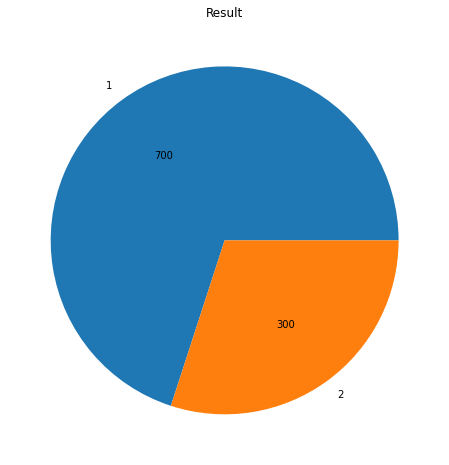

In [4]:
plt.figure(figsize=(8,8))
plt.title("Result")
plt.pie(german_num_df.Result.value_counts(), labels=german_num_df.Result.value_counts().index, autopct= lambda x: '{:.0f}'.format(x*german_num_df.Result.value_counts().sum()/100))
plt.show()

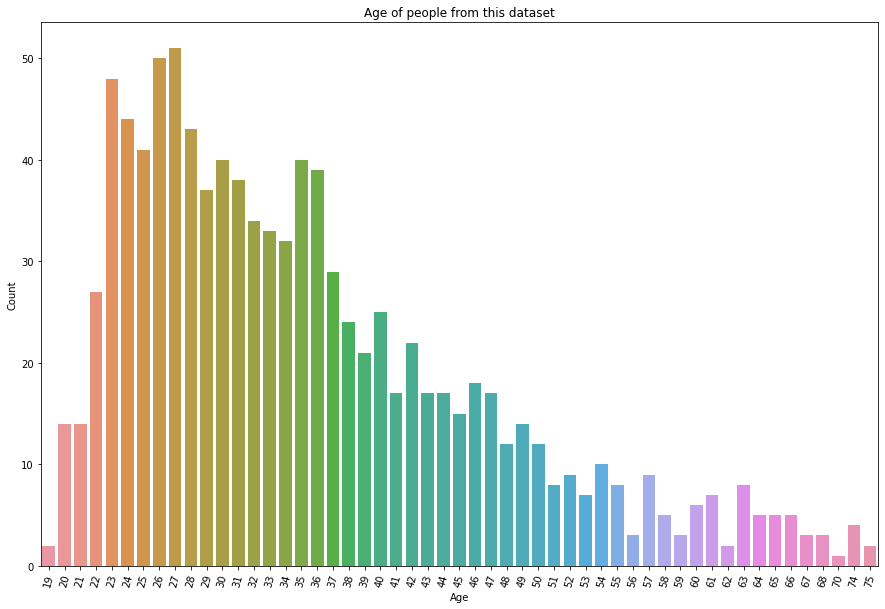

In [5]:
plotting_age_cnt = german_num_df['Age in years'].value_counts()

plt.figure(figsize=(15,10))
plt.title('Age of people from this dataset')
plt.xticks(rotation=75)
sns.barplot(x=plotting_age_cnt.index, y=plotting_age_cnt.values)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

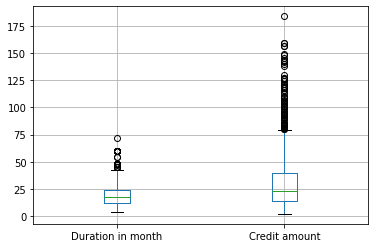

In [6]:
bx = german_num_df.boxplot(column=['Duration in month','Credit amount'])

In [7]:
print('Some statistics for credit amount column in DM - Deutsche Mark (German Mark)\n')

print((german_num_df['Credit amount']*100).describe())

Some statistics for credit amount column in DM - Deutsche Mark (German Mark)

count     1000.000000
mean      3271.100000
std       2825.260499
min        200.000000
25%       1400.000000
50%       2300.000000
75%       4000.000000
max      18400.000000
Name: Credit amount, dtype: float64


## Adult Dataset

**Adult dataset need to be uploaded in the file structure**

In [8]:
df_raw = pd.read_csv("adult.csv")

### Attribute Information for dataset Adult:

Data Set Information:<br>
Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.Extraction was done by Barry Becker from the 1994 Census database. 

Attribute 1: **age** (continuous)

Attribute 2: **workclass** (categorical)

+ Possible values: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked

Attribute 3: **fnlwgt** (continuous) - the number of people the census believes the entry represents.

Attribute 4: **education** (categorical)

+ Possible values: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool

Attibute 5: **education-num** (continuous)

Attribute 6: **marital-status** (categorical)

+ Possible values: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces

Attribute 7: **relationship** (categorical)

+ Possible values: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried

Attribute 8: **race** (categorical)

+ Possible values: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black

Attribute 9: **sex** (categorical)

+ Possible values: Female, Male

Attribute 10: **capital-gain** (continuous)

Attribute 11: **capital-loss** (continuous)

Attribute 12: **hours-per-week** (continuous)

Attribute 13: **native-country** (categorical)

+ Possible values: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands

Attribute 14: **income** (categorical)

+ Possible values: >50K, <=50K

In [9]:
df_raw.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [10]:
df_clean = df_raw.replace({'?': np.nan}).dropna()
df_clean.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [11]:
df_clean.shape

(30162, 15)

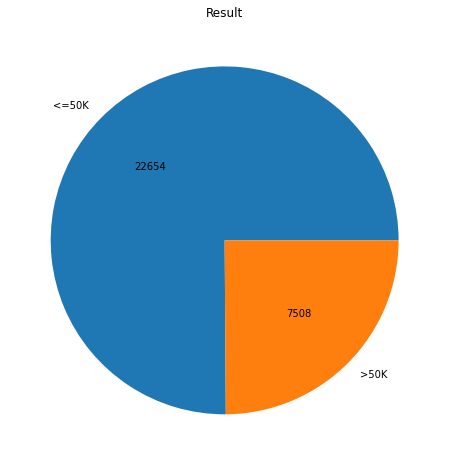

In [12]:
plt.figure(figsize=(8,8))
plt.title("Result")
plt.pie(df_clean.income.value_counts(), labels=df_clean.income.value_counts().index, autopct= lambda x: '{:.0f}'.format(x*df_clean.income.value_counts().sum()/100))
plt.show()

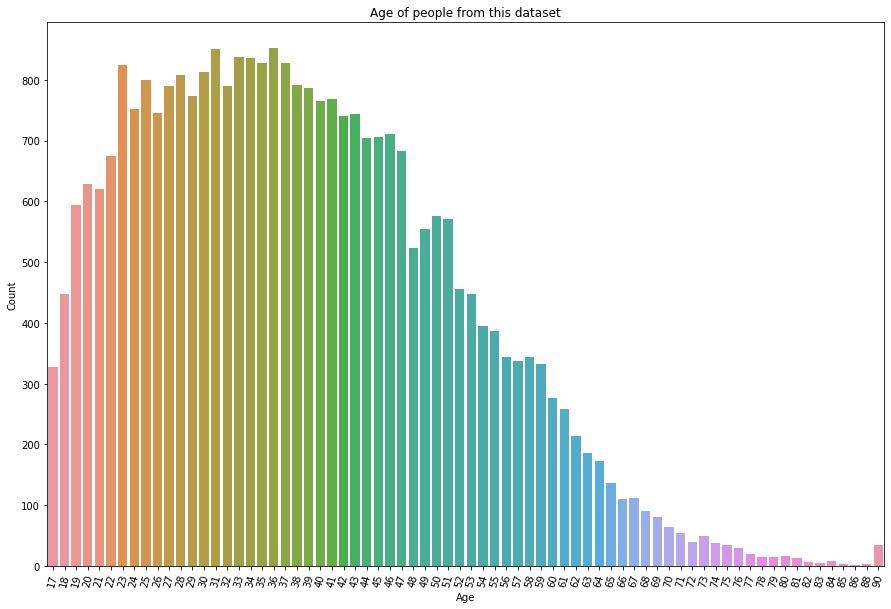

In [13]:
plotting_age_cnt = df_clean['age'].value_counts()

plt.figure(figsize=(15,10))
plt.title('Age of people from this dataset')
plt.xticks(rotation=75)
sns.barplot(x=plotting_age_cnt.index, y=plotting_age_cnt.values)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [14]:
df_clean.groupby(['education']).mean().drop(['fnlwgt','education.num'], axis = 1)

,age,capital.gain,capital.loss,hours.per.week
education,,,,
10th,37.897561,395.914634,62.268293,37.464634
11th,32.363550,217.190840,52.538168,34.193702
12th,32.013263,265.501326,32.891247,35.697613
1st-4th,44.622517,113.940397,53.768212,38.377483
5th-6th,41.649306,170.038194,71.524306,38.798611
7th-8th,47.631957,244.703770,66.229803,40.131059
9th,40.303297,354.298901,28.980220,38.767033
Assoc-acdm,37.286706,554.921627,94.377976,41.184524
Assoc-voc,38.246366,737.344300,70.198929,41.954093


#<font color='#6AA84F'>Section B (Data preprocessing)</font>

## German Statlog Dataset

### Prepare Data



We are changing result column to have all values in {0,1}, to simplify understanding:
* 0 - means that person will not be able to pay for his credit
* 1 - means that person will be able to pay for his credit

Also we are dropping columns 19, 21, 23 because we don't have any info what this columns are representing.

In [15]:
# to see all columns in pandas dataframe
pd.set_option('display.max_columns', None)
# to have results 0 and 1
german_num_df['Result'] = german_num_df['Result'] - 1
# drop unknown columns 
german_num_df.drop(labels=['19','21','23'],axis=1, inplace=True)

In [16]:
german_num_df.columns

Index(['Status of existing checking account', 'Duration in month',
       'Credit history', 'Credit amount', 'Savings account/bonds',
       'Present employment since', 'Personal status and sex',
       'Present residence since', 'Property', 'Age in years',
       'Other installment plans', 'Number of existing credits at this bank',
       'Number of people being liable to provide maintenance for', 'Telephone',
       'foreign worker', 'Purpose Car new', 'Purpose Car used',
       'None other debtors / guarantors', 'Co-applicant', 'Housing', 'Job',
       'Result'],
      dtype='object')

In [17]:
german_num_df.shape

(1000, 22)

In [18]:
german_num_df.head(10)

,Status of existing checking account,Duration in month,Credit history,Credit amount,Savings account/bonds,Present employment since,Personal status and sex,Present residence since,Property,Age in years,Other installment plans,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Telephone,foreign worker,Purpose Car new,Purpose Car used,None other debtors / guarantors,Co-applicant,Housing,Job,Result
0,1,6,4,12,5,5,3,4,1,67,3,2,1,2,1,0,0,1,0,1,0,0
1,2,48,2,60,1,3,2,2,1,22,3,1,1,1,1,0,0,1,0,1,0,1
2,4,12,4,21,1,4,3,3,1,49,3,1,2,1,1,0,0,1,0,1,1,0
3,1,42,2,79,1,4,3,4,2,45,3,1,2,1,1,0,0,0,0,0,0,0
4,1,24,3,49,1,3,3,4,4,53,3,2,2,1,1,1,0,1,0,0,0,1
5,4,36,2,91,5,3,3,4,4,35,3,1,2,2,1,0,0,1,0,0,1,0
6,4,24,2,28,3,5,3,4,2,53,3,1,1,1,1,0,0,1,0,1,0,0
7,2,36,2,69,1,3,3,2,3,35,3,1,1,2,1,0,1,1,0,0,0,0
8,4,12,2,31,4,4,1,4,1,61,3,1,1,1,1,0,0,1,0,1,1,0
9,2,30,4,52,1,1,4,2,3,28,3,2,1,1,1,1,0,1,0,1,0,1


### Split dataset to train, test and validation

**Training Dataset**: It is the set of data that is used to train and make the model learn the hidden features/patterns in the data.

**Validation Dataset**: The validation set is a set of data, separate from the training set, that is used to validate our model performance during training.

**Test Dataset**: The test set is a separate set of data used to test the model after completing the training.

We are splitting out dataset in proportion:

 - **test** ~ 1/3 

 - **train** ~ 2/3
 
After we are splitting our train part to **train** and **validation** sets.

 - **validation** ~ 1/5 from **train** size

Why 70/30 relation between training and testing sets a pedagogical explanation? Empirical studies show that the best results are obtained if we use 20-30% of the data for testing, and the remaining 70-80% of the data for training.

#### FFNN

In [19]:
X_german = german_num_df.iloc[:, 0:21].values
y_german = german_num_df.iloc[:, 21].values
X_german=normalize(X_german,axis=0)

# test = 0.3 train = 0.56 validation = 0.14
X_train_german, X_test_german, y_train_german, y_test_german = train_test_split(X_german, y_german, train_size=0.7, random_state=31)
X_train_german, X_val_german, y_train_german, y_val_german = train_test_split(X_train_german, y_train_german, train_size=0.8, random_state=31)

#### SOM

In [20]:
X_train_som_german, X_test_som_german, y_train_som_german, y_test_som_german = train_test_split(X_german, y_german, train_size=0.7, random_state=31)

## Adult Dataset

**Steps taken:**
+ we dropped the "education" column, because it contains the same data as column "education.num".
+ we defined the columns that will be features
+ we prepared the arguments for scikit-learn library methods
+ we transformed categorical data to integer. Given a column with categorical variables, we encoded that column into multiple columns containing binary variables. This process is called "one-hot-encoding" or "dummy encoding".


In [21]:
df_adult = df_clean.drop(['education'], axis = 1)

features = [
    'age', 'workclass', 'fnlwgt', 'education.num',
    'marital.status', 'occupation', 'relationship', 'race', 'sex',
    'capital.gain', 'capital.loss', 'hours.per.week', 'native.country'
]

X_adult = df_adult[features].values

lbp = LabelEncoder()

X_adult[:, 1] = lbp.fit_transform(X_adult[:, 1])

X_adult[:, 4] = lbp.fit_transform(X_adult[:, 4])

X_adult[:, 5] = lbp.fit_transform(X_adult[:, 5])

X_adult[:, 6] = lbp.fit_transform(X_adult[:, 6])

X_adult[:, 7] = lbp.fit_transform(X_adult[:, 7])

X_adult[:, 8] = lbp.fit_transform(X_adult[:, 8])

X_adult[:, 12] = lbp.fit_transform(X_adult[:, 12])

Checking if the data has changed from the first three lines

In [22]:
df_adult.head(3)

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [23]:
X_adult[0:3]

array([[82, 2, 132870, 9, 6, 3, 1, 4, 0, 0, 4356, 18, 38],
       [54, 2, 140359, 4, 0, 6, 4, 4, 0, 0, 3900, 40, 38],
       [41, 2, 264663, 10, 5, 9, 3, 4, 0, 0, 3900, 40, 38]], dtype=object)

As we can see in the data there is a big difference between high numbers and low numbers, so we must scale the data to keep them on the same scale.

In [24]:
y_adult = lbp.fit_transform(df_adult["income"])

scaler = StandardScaler()

X_adult = scaler.fit_transform(X_adult)

### FFNN split

In [25]:
X_train_adult, X_test_adult, y_train_adult, y_test_adult = train_test_split(X_adult, y_adult, train_size=0.7, random_state=31)
X_train_adult, X_val_adult, y_train_adult, y_val_adult = train_test_split(X_train_adult, y_train_adult, train_size=0.8, random_state=31)

### SOM split

In [26]:
X_train_som_adult, X_test_som_adult, y_train_som_adult, y_test_som_adult = train_test_split(X_adult, y_adult, train_size=0.7, random_state=31)

#<font color='#6AA84F'>Section C</font>

## German Statlog Dataset

####FFNN

Below we built our intial version of **feedforward ANN** for *german credit data dataset*. For begging, we used 3 layers:
+ 1 input
+ 1 hidden
+ 1 output 

In **input** layer we are using *Flatten*. It helps us to flatten the input. Does not affect the batch size. As input shape we are using our amount of columns **without *result* column**.

In **hidden** layer we have 15 neurons due to the proportion 2/3 from input neurons + output neurons. As activation function we chose *relu*(Rectified Linear Unit), because it is the most used activation function in the world right now and we don't have any idea which function to use at the beggining. It has range from 0 to +inf.

In **output** layer we have 1 neuron because we want to make binary classification.
We used *sigmoid* as activation function because it normalizes output and we have only two options as a result 0 or 1 (will the person be able to pay for credit).

In [27]:
model_german = keras.Sequential([
    keras.layers.Flatten(input_shape=(21,)), #TODO change shape value
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

###SOM

Below we built our intial version of **SOM ANN** for german credit data dataset.

First two parameters is the size of map. We chose 13x13 due to proportion 5*(samples)^1/2. We have 700 samples for train dataset. Input len is 21 (amount of columns). 

Neighborhood function is default gaussian function.


And also we initialize the weights to span the first two principal components. It helps us make the training process converge faster.


In [28]:
som_german = MiniSom(13, 13, 21, learning_rate=0.4, 
              neighborhood_function='gaussian')
som_german.random_weights_init(X_train_som_german)

## Adult Dataset

For FFNN, we also want to perform binary classification, so our model looks the same. The difference is only in the input shape due to different number of features. 
For SOM, using the pattern from above to calculate the size of map for our dataset, we decided on a 27x27 map

In [29]:
model_adult = keras.Sequential([
    keras.layers.Flatten(input_shape=(13,)),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

In [30]:
som_adult = MiniSom(27, 27, 13, sigma=3, learning_rate=0.001, 
              neighborhood_function='gaussian', random_seed=41)
som_adult.pca_weights_init(X_train_som_adult)


#<font color='#6AA84F'>Section D (Network training)</font>

## German Statlog Dataset


###FFNN
Model.compile() is the function that configures the model for training.

As optimizer we used *adam*(Adaptive moment estimation).
Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

As loss function we used *binary_crossentropy*. It computes the cross-entropy loss between true labels and predicted labels. We used this cross-entropy loss because we have binary (0 or 1) classification application.

Model.fit() is the function which trains the model for a fixed number of epochs.
For the begging we used 100 epochs. batch_size 32 as a default value.

In [31]:
model_german.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
start_german = clock() 
history_german = model_german.fit(X_train_german, y_train_german, epochs=100, validation_data=(X_val_german,y_val_german), batch_size=32, verbose=1)
end_german = clock() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


Epoch 1/100
18/18 [==============================] - 2s 33ms/step - loss: 0.6766 - accuracy: 0.7179 - val_loss: 0.6752 - val_accuracy: 0.6643
Epoch 2/100
18/18 [==============================] - 0s 10ms/step - loss: 0.6599 - accuracy: 0.7179 - val_loss: 0.6628 - val_accuracy: 0.6643
Epoch 3/100
18/18 [==============================] - 0s 8ms/step - loss: 0.6420 - accuracy: 0.7179 - val_loss: 0.6525 - val_accuracy: 0.6643
Epoch 4/100
18/18 [==============================] - 0s 8ms/step - loss: 0.6266 - accuracy: 0.7179 - val_loss: 0.6446 - val_accuracy: 0.6643
Epoch 5/100
18/18 [==============================] - 0s 13ms/step - loss: 0.6131 - accuracy: 0.7179 - val_loss: 0.6400 - val_accuracy: 0.6643
Epoch 6/100
18/18 [==============================] - 0s 12ms/step - loss: 0.6055 - accuracy: 0.7179 - val_loss: 0.6379 - val_accuracy: 0.6643
Epoch 7/100
18/18 [==============================] - 0s 14ms/step - loss: 0.5986 - accuracy: 0.7179 - val_loss: 0.6378 - val_accuracy: 0.6643
Epoch 8/

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


###SOM
Here we define classify function for **SOM** which classifying each sample in data in one of the classes definited using the method labels_map.Returns a list of the same length of data where the i-th element is the class assigned to data[i].

And train our **SOM** model for train dataset in 100 epochs

In [32]:
def classify_german(som, data):
    winmap = som.labels_map(X_train_som_german, y_train_som_german)
    default_class = np.sum(list(winmap.values())).most_common()[0][0]
    result = []
    for d in data:
        win_position = som.winner(d)
        if win_position in winmap:
            result.append(winmap[win_position].most_common()[0][0])
        else:
            result.append(default_class)
    return result

In [33]:
som_german.train_random(X_train_german, 100)

## Adult Dataset

###FFNN
Here we used the same parameters as in previous dataset.

In [34]:
model_adult.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_adult = model_adult.fit(X_train_adult, y_train_adult, epochs=100, validation_data=(X_val_adult, y_val_adult), batch_size=32)

Epoch 1/100
528/528 [==============================] - 6s 8ms/step - loss: 0.5164 - accuracy: 0.7321 - val_loss: 0.4076 - val_accuracy: 0.8151
Epoch 2/100
528/528 [==============================] - 4s 7ms/step - loss: 0.3842 - accuracy: 0.8217 - val_loss: 0.3734 - val_accuracy: 0.8276
Epoch 3/100
528/528 [==============================] - 2s 5ms/step - loss: 0.3616 - accuracy: 0.8317 - val_loss: 0.3565 - val_accuracy: 0.8359
Epoch 4/100
528/528 [==============================] - 2s 3ms/step - loss: 0.3495 - accuracy: 0.8382 - val_loss: 0.3480 - val_accuracy: 0.8413
Epoch 5/100
528/528 [==============================] - 1s 2ms/step - loss: 0.3429 - accuracy: 0.8391 - val_loss: 0.3424 - val_accuracy: 0.8421
Epoch 6/100
528/528 [==============================] - 1s 2ms/step - loss: 0.3391 - accuracy: 0.8423 - val_loss: 0.3393 - val_accuracy: 0.8409
Epoch 7/100
528/528 [==============================] - 1s 3ms/step - loss: 0.3369 - accuracy: 0.8431 - val_loss: 0.3375 - val_accuracy: 0.8432

###SOM
For this dataset, we decided to start from 50000 epochs, because this dataset has more samples. This number of epochs is arbitrary for initialization.

In [35]:
def classify_adult(som, data):
    winmap = som.labels_map(X_train_adult, y_train_adult)
    default_class = np.sum(list(winmap.values())).most_common()[0][0]
    result = []
    for d in data:
        win_position = som.winner(d)
        if win_position in winmap:
            result.append(winmap[win_position].most_common()[0][0])
        else:
            result.append(default_class)
    return result

In [36]:
som_adult.train_random(X_train_adult, 50000, verbose=1)

 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 2.335718153357994



#<font color='#6AA84F'>Section E (Training Results)</font>


## German Statlog Dataset

###FFNN

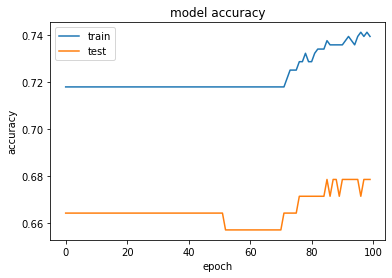

In [37]:
# summarize history for accuracy
plt.plot(history_german.history['accuracy'])
plt.plot(history_german.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

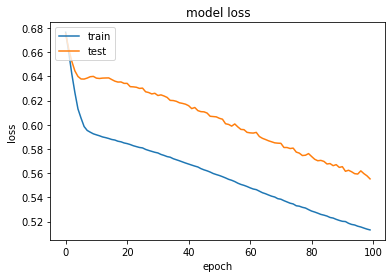

In [38]:
# summarize history for loss
plt.plot(history_german.history['loss'])
plt.plot(history_german.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Below our first results

In [39]:
eval_results_german = model_german.evaluate(X_test_german, y_test_german, verbose=0) 
print("Loss, accuracy on test data: ")
print("%0.4f %0.2f%%" % (eval_results_german[0], eval_results_german[1]*100))
print(f"Time running {end_german - start_german}s")

Loss, accuracy on test data: 
0.5452 70.67%
Time running 13.608561000000002s


###SOM

In [40]:
print(classification_report(y_test_som_german, classify_german(som_german, X_test_som_german)))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       205
           1       0.60      0.53      0.56        95

    accuracy                           0.74       300
   macro avg       0.69      0.68      0.69       300
weighted avg       0.73      0.74      0.73       300



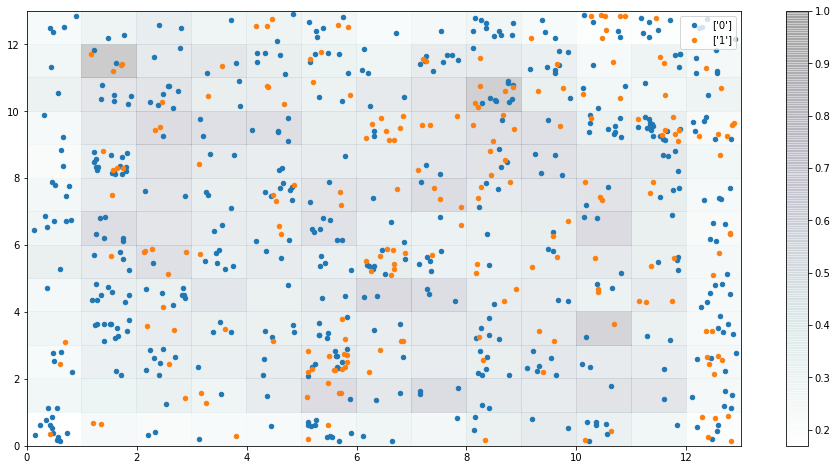

In [41]:
label_names_german = {0:'0', 1:'1'}
w_x_german, w_y_german = zip(*[som_german.winner(d) for d in X_train_som_german])
w_x_german = np.array(w_x_german)
w_y_german = np.array(w_y_german)

plt.figure(figsize=(16, 8))
plt.pcolor(som_german.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(y_train_som_german):
    idx_target_german = y_train_som_german==c
    plt.scatter(w_x_german[idx_target_german]+.5+(np.random.rand(np.sum(idx_target_german))-.5)*.8,
                w_y_german[idx_target_german]+.5+(np.random.rand(np.sum(idx_target_german))-.5)*.8, 
                s=20, label=[label_names_german[c]])
plt.legend(loc='upper right')
plt.show()

### ROC curve

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. 

#### FFNN

In [42]:
y_pred_keras_german = model_german.predict(X_test_german).ravel()
fpr_keras_german, tpr_keras_german, thresholds_keras_german = roc_curve(y_test_german, y_pred_keras_german)

10/10 [==============================] - 0s 2ms/step


**AUC** stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

In [43]:
auc_keras_german = auc(fpr_keras_german, tpr_keras_german)

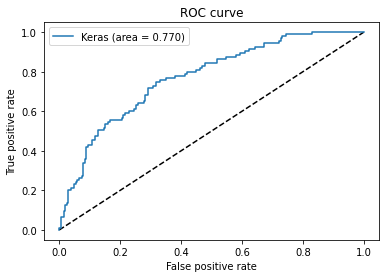

In [44]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras_german, tpr_keras_german, label='Keras (area = {:.3f})'.format(auc_keras_german))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

####SOM

In [45]:
y_pred_som_german = np.array(classify_german(som_german, X_test_som_german)).ravel()
fpr_som_german, tpr_som_german, thresholds_som_german = roc_curve(y_test_som_german, y_pred_som_german)
auc_som_german = auc(fpr_som_german, tpr_som_german)

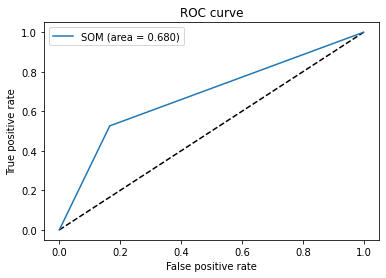

In [46]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_som_german, tpr_som_german, label='SOM (area = {:.3f})'.format(auc_som_german))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

##Adult Dataset

### FFNN

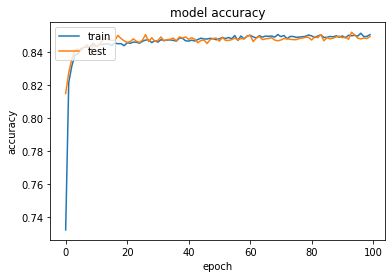

In [47]:
# summarize history for accuracy
plt.plot(history_adult.history['accuracy'])
plt.plot(history_adult.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

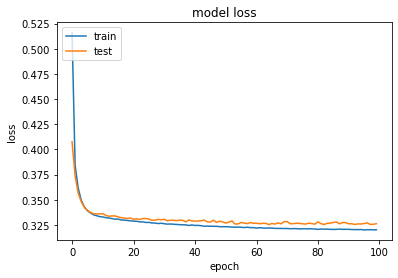

In [48]:
# summarize history for loss
plt.plot(history_adult.history['loss'])
plt.plot(history_adult.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [49]:
eval_results_adult = model_adult.evaluate(X_test_adult, y_test_adult, verbose=0) 

print("Loss, accuracy on test data: ")
print("%0.4f %0.2f%%" % (eval_results_adult[0], eval_results_adult[1]*100))

Loss, accuracy on test data: 
0.3243 85.00%


### SOM

In [50]:
print(classification_report(y_test_adult, classify_adult(som_adult, X_test_adult)))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      6835
           1       0.61      0.44      0.51      2214

    accuracy                           0.79      9049
   macro avg       0.72      0.67      0.69      9049
weighted avg       0.78      0.79      0.78      9049



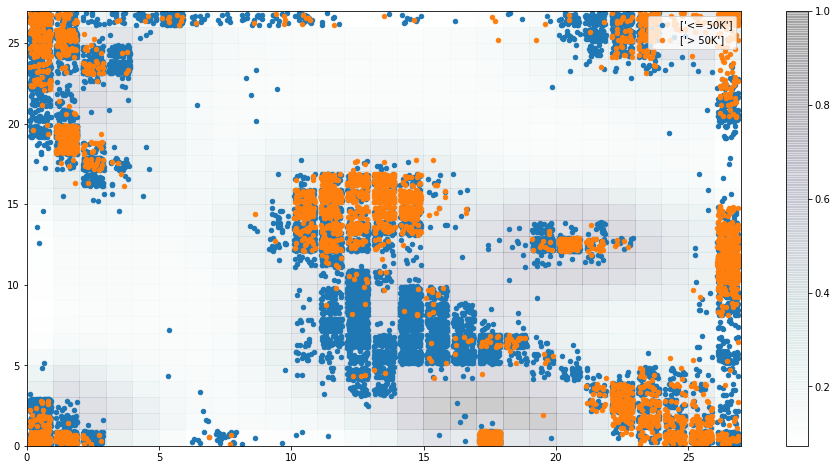

In [51]:
label_names_adult = {0:'<= 50K', 1:'> 50K'}
w_x_adult, w_y_adult = zip(*[som_adult.winner(d) for d in X_train_adult])
w_x_adult = np.array(w_x_adult)
w_y_adult = np.array(w_y_adult)

plt.figure(figsize=(16, 8))
plt.pcolor(som_adult.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(y_train_adult):
    idx_target_adult = y_train_adult==c
    plt.scatter(w_x_adult[idx_target_adult]+.5+(np.random.rand(np.sum(idx_target_adult))-.5)*.8,
                w_y_adult[idx_target_adult]+.5+(np.random.rand(np.sum(idx_target_adult))-.5)*.8, 
                s=20, label=[label_names_adult[c]])
plt.legend(loc='upper right')
plt.show()

### ROC curve

#### FFNN

In [52]:
y_pred_keras_adult = model_adult.predict(X_test_adult).ravel()
fpr_keras_adult, tpr_keras_adult, thresholds_keras_adult = roc_curve(y_test_adult, y_pred_keras_adult)

283/283 [==============================] - 0s 1ms/step


In [53]:
auc_keras_adult = auc(fpr_keras_adult, tpr_keras_adult)

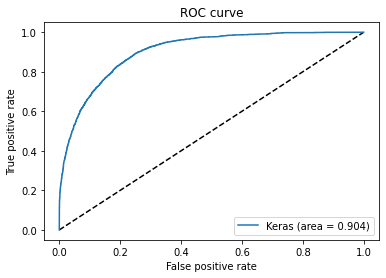

In [54]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras_adult, tpr_keras_adult, label='Keras (area = {:.3f})'.format(auc_keras_adult))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

#### SOM

In [55]:
y_pred_som_adult = np.array(classify_adult(som_adult, X_test_adult)).ravel()
fpr_som_adult, tpr_som_adult, thresholds_som_adult = roc_curve(y_test_adult, y_pred_som_adult)

In [56]:
auc_som_adult = auc(fpr_som_adult, tpr_som_adult)

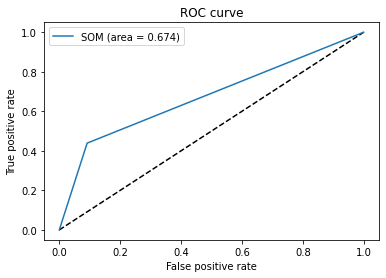

In [57]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_som_adult, tpr_som_adult, label='SOM (area = {:.3f})'.format(auc_som_adult))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


#<font color='#6AA84F'>Section F (Parameter tuning)</font>

## German Statlog Dataset

### FFNN

We decided to start experiments by changing our dataset's sizes a little bit.
For **train** dataset ~ 600 samples
For **test** dataset ~ 200 samples
For **validation** dataset ~ 200 samples

Because we wanted our model to have more train data.

In [58]:
X_german = german_num_df.iloc[:, 0:21].values
y_german = german_num_df.iloc[:, 21].values
X_german=normalize(X_german,axis=0)

# test = 0.2 train = 0.6 validation = 0.2
X_train_german, X_test_german, y_train_german, y_test_german = train_test_split(X_german, y_german, train_size=0.8, random_state=31)
X_train_german, X_val_german, y_train_german, y_val_german = train_test_split(X_train_german, y_train_german, train_size=0.75, random_state=31)

In [59]:
X_train_german.shape

(600, 21)

In [60]:
X_test_german.shape

(200, 21)

In [61]:
X_val_german.shape

(200, 21)

In [62]:
model_german = keras.Sequential([
    keras.layers.Flatten(input_shape=(21,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

In [63]:
opt_german = keras.optimizers.Adam(learning_rate=5e-4)

In [64]:
model_german.compile(optimizer=opt_german,
              loss='binary_crossentropy',
              metrics=['accuracy'])
start_german = clock() 
history_model_german = model_german.fit(X_train_german, y_train_german, epochs=300, validation_data=(X_val_german,y_val_german), batch_size=8, verbose=1)
end_german = clock() 

Epoch 1/300


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


75/75 [==============================] - 1s 5ms/step - loss: 0.6769 - accuracy: 0.7017 - val_loss: 0.6540 - val_accuracy: 0.7200
Epoch 2/300
75/75 [==============================] - 0s 3ms/step - loss: 0.6425 - accuracy: 0.7017 - val_loss: 0.6165 - val_accuracy: 0.7200
Epoch 3/300
75/75 [==============================] - 0s 3ms/step - loss: 0.6181 - accuracy: 0.7017 - val_loss: 0.5974 - val_accuracy: 0.7200
Epoch 4/300
75/75 [==============================] - 0s 3ms/step - loss: 0.6080 - accuracy: 0.7017 - val_loss: 0.5895 - val_accuracy: 0.7200
Epoch 5/300
75/75 [==============================] - 0s 3ms/step - loss: 0.6049 - accuracy: 0.7017 - val_loss: 0.5868 - val_accuracy: 0.7200
Epoch 6/300
75/75 [==============================] - 0s 3ms/step - loss: 0.6033 - accuracy: 0.7017 - val_loss: 0.5848 - val_accuracy: 0.7200
Epoch 7/300
75/75 [==============================] - 0s 3ms/step - loss: 0.6026 - accuracy: 0.7017 - val_loss: 0.5832 - val_accuracy: 0.7200
Epoch 8/300
75/75 [======

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


In [65]:
eval_results_german = model_german.evaluate(X_test_german, y_test_german, verbose=0) 
print("Loss, accuracy on test data: ")
print("%0.4f %0.2f%%" % (eval_results_german[0], eval_results_german[1]*100))
print(f"Time running {end_german - start_german}s")

Loss, accuracy on test data: 
0.4963 77.50%
Time running 72.78304s


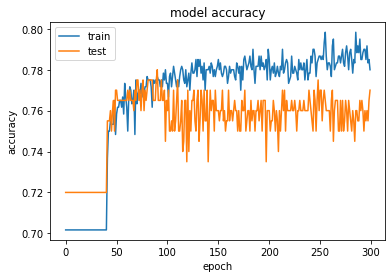

In [66]:
# summarize history for accuracy
plt.plot(history_model_german.history['accuracy'])
plt.plot(history_model_german.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

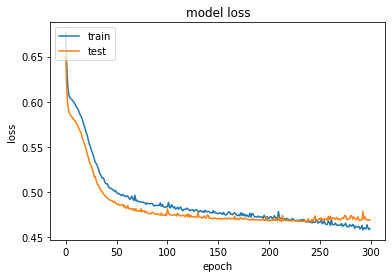

In [67]:
# summarize history for loss
plt.plot(history_model_german.history['loss'])
plt.plot(history_model_german.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [68]:
y_pred_keras_german = model_german.predict(X_test_german).ravel()
fpr_keras_german, tpr_keras_german, thresholds_keras_german = roc_curve(y_test_german, y_pred_keras_german)

7/7 [==============================] - 0s 3ms/step


In [69]:
auc_keras_german = auc(fpr_keras_german, tpr_keras_german)

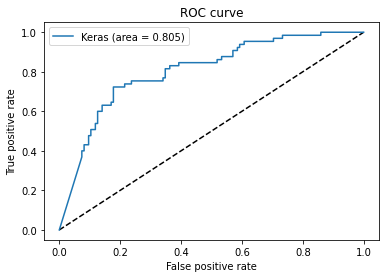

In [70]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras_german, tpr_keras_german, label='Keras (area = {:.3f})'.format(auc_keras_german))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

#### Train function

In [71]:
def train_german(batch_size, lr, hidden_layers_sizes):

  model_german = [keras.layers.Flatten(input_shape=(21,))]
  for hls in hidden_layers_sizes:
    model_german.append(keras.layers.Dense(hls, activation='relu'))
  model_german.append(keras.layers.Dense(1, activation='sigmoid'))
  model_german = keras.Sequential(model_german)
  opt = keras.optimizers.Adam(learning_rate=lr)
  model_german.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])
  model_german.fit(X_train_german, y_train_german, epochs=300, validation_data=(X_val_german,y_val_german), batch_size=batch_size, verbose=0, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])
  eval_results_german = model_german.evaluate(X_test_german, y_test_german, verbose=0)
  return eval_results_german

In [72]:
history_german = {}

hlss_german=[[16, 8], [16, 8, 4], [32, 8], [32, 16], [32, 16, 8]]
lrs_german = [5e-2, 1e-3, 5e-4]
bss_german = [8,16,32,64,128]

# with tqdm(total=len(hlss_german)*len(lrs_german)*len(bss_german)) as pbar:
#   for hls in hlss_german:
#     for lr in lrs_german:
#       for bs in bss_german:
#         history[(bs, lr, tuple(hls))] = train(bs, lr, hls)
#         pbar.update(1)

Sorted from max to min values by accuracy

In [73]:
dict(sorted(history_german.items(), key=lambda item: item[1][1], reverse=True))

{}

#### Our Steps to find better model (FFNN)
1. Firstly, we decided to have 100 epochs and decrease number of neurons for input layer to 16 and added one more hidden layer with 8 neurons. Activation function was relu.

2. We changed the learning rate from 1e-3 to 1e-2, and in the result our model started to learn more quicker. Also, we changed the number of epochs from 100 to 500 and we were observing that loss and validating loss started to differ a lot, and val_loss was much higher. It's the result of overfitting.

3. After that we decided to changed epochs number to 300 and change back learning rate to 1e-3. For changing learning rate we defined ADAM optimizer. And resplit our dataset with 60/20/20 proportions. Thanks to these parameters, we expected that our model will learn fast enough and will not have overfitting. We also decided to have 2 hidden layers first one with 16 layers and the second one with 8. Because of our previous version has very poor structure.<p> And all these changes gave result accuracy - 78.12% and loss 0.5021

4. We added one more hidden layer with 4 neurons and for middle hidder layer we changed activation function to *softmax*.
<br>Results:
* Loss - 0.5154
* Accuracy - 76.33%
5. We tried to decrease learing rate, but big effects this didn't give us. We changed epochs too, but result was the same.
6. With SGD optimizer we had good results, but the running time was 1.5 times greater that the time with ADAM optimizer. 
<br>Results:
*  Loss - 0.5038 
*  Accuracy - 77.00%
*  Time running 41.81404899999984s
7. Also we tried NADAM optimizer it had same results but the running time was 53s.

8. In the end, we created the function "train". Because changing parameters and trying to find better takes a lot of time.<p> This function helps us to find the best model by passing specific parameters for our model. We decided that 300 epochs, ADAM optimizers and RELU activation function the best for our case.
<p>
So we specified such parameters: <br>
hlss=[[16, 8], [16, 8, 4], [32, 8], [32, 16], [32, 16, 8]] - our hidden layers <br>
lrs = [5e-2, 1e-3, 5e-4] - our learning rate <br>
bss = [8,16,32,64,128] - our batch size <br>
<p>
Also we add callback parameter, which monitor model's val_loss. If the value does not change within 10 epochs, then training is interrupted.  

So the best result we had yet: 
- input layer 21 neurons, 2 hidden layers 8 neurons + 4 neurons with relu function, output layer 1 neuron with sigmoid function. 
- Optimizer - ADAM. 
- Learning rate 5e-4. 
- Batch size = 8.
- Dataset proportions 60/20/20 train/test/validation.


### SOM

We decided to start experiments by changing our dataset's sizes a little bit. We don't use validation dataset for SOM model. Because minisom takes only train and test sets. For train dataset ~ 600 samples For test dataset ~ 400 samples.

Because we wanted our model to have more train data.

In [74]:
X_train_som_german, X_test_som_german, y_train_som_german, y_test_som_german = train_test_split(X_german, y_german, train_size=0.6, random_state=31)

In [75]:
def classify_german(som, data):
    winmap = som.labels_map(X_train_som_german, y_train_som_german)
    default_class = np.sum(list(winmap.values())).most_common()[0][0]
    result = []
    for d in data:
        win_position = som.winner(d)
        if win_position in winmap:
            result.append(winmap[win_position].most_common()[0][0])
        else:
            result.append(default_class)
    return result

In [76]:
som_german = MiniSom(12, 12, 21, learning_rate=0.001, sigma = 4,
              neighborhood_function='triangle', activation_distance='euclidean', topology='rectangular', random_seed=42)
som_german.random_weights_init(X_train_som_german)
som_german.train_batch(X_german, 2650, verbose=True)

 [ 2650 / 2650 ] 100% - 0:00:00 left 
 quantization error: 0.04121648805208467


In [77]:
print(classification_report(y_test_som_german, classify_german(som_german, X_test_som_german)))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       278
           1       0.58      0.40      0.47       122

    accuracy                           0.73       400
   macro avg       0.67      0.64      0.64       400
weighted avg       0.71      0.73      0.71       400



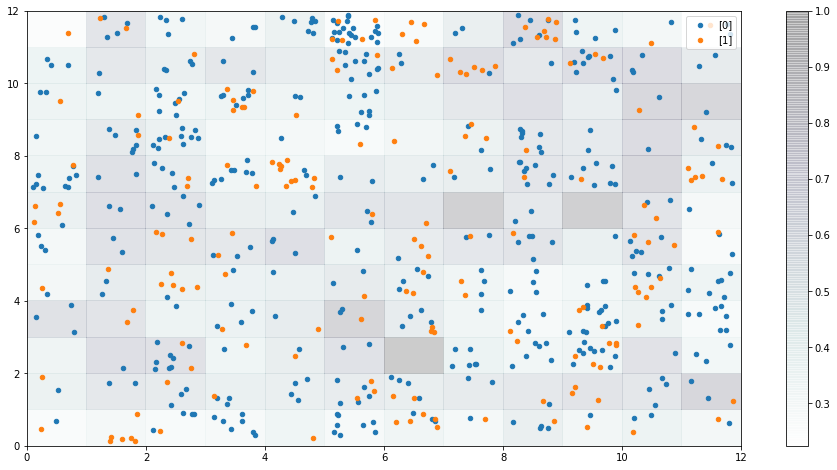

In [78]:
label_names_german = {0: 0, 1: 1}
w_x_german, w_y_german = zip(*[som_german.winner(d) for d in X_train_som_german])
w_x_german = np.array(w_x_german)
w_y_german = np.array(w_y_german)

plt.figure(figsize=(16, 8))
plt.pcolor(som_german.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(y_train_som_german):
    idx_target_german = y_train_som_german==c
    plt.scatter(w_x_german[idx_target_german]+.5+(np.random.rand(np.sum(idx_target_german))-.5)*.8,
                w_y_german[idx_target_german]+.5+(np.random.rand(np.sum(idx_target_german))-.5)*.8, 
                s=20, label=[label_names_german[c]])
plt.legend(loc='upper right')
plt.show()

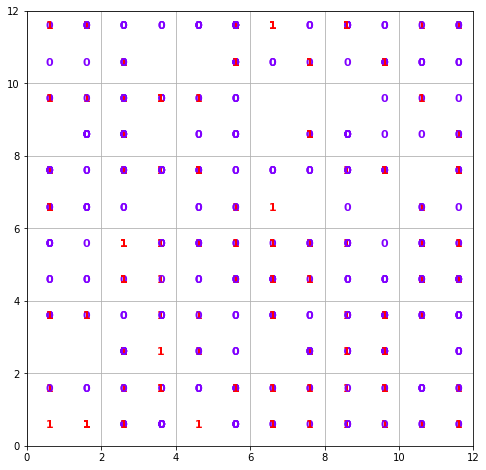

In [79]:
plt.figure(figsize=(8, 8))
wmap = {}
im = 0
for x, t in zip(X_train_german, y_train_german):  # scatterplot
    w = som_german.winner(x)
    wmap[w] = im
    plt.text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.rainbow(t / 1.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt.axis([0, som_german.get_weights().shape[0], 0,  som_german.get_weights().shape[1]])
plt.grid()
plt.show()

In [80]:
y_pred_som_german = np.array(classify_german(som_german, X_test_som_german)).ravel()
fpr_som_german, tpr_som_german, thresholds_som_german = roc_curve(y_test_som_german, y_pred_som_german)
auc_som_german = auc(fpr_som_german, tpr_som_german)

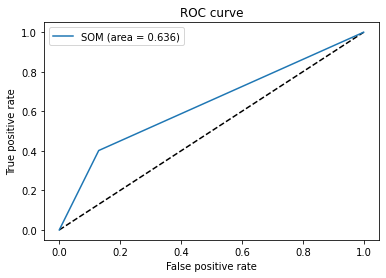

In [81]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_som_german, tpr_som_german, label='SOM (area = {:.3f})'.format(auc_som_german))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [82]:
def train_som_german(sigma, lr, ng_func, act_dist, topology, weight_init, train_init, epochs):
  som_german = MiniSom(13, 13, 21, learning_rate=lr, 
              neighborhood_function=ng_func, activation_distance=act_dist, topology=topology, random_seed=42)
  if weight_init == 1:
    som_german.random_weights_init(X_train_som_german)
  else:
    som_german.pca_weights_init(X_train_som_german)

  if train_init == 1:
    som_german.train_random(X_train_som_german, epochs)
  else:
    som_german.train_batch(X_train_som_german, epochs)

  clas_rep = classification_report(y_test_som_german, classify_german(som_german, X_test_som_german), output_dict=True)
  return clas_rep

In [83]:
history_german = {}

sigmas_german = [2, 3, 4, 5]
lrs_german = [5e-2, 1e-3, 5e-4]
epochs_german = [100, 500, 1000, 2000, 3000, 5000]
ng_funs_german = ['gaussian', 'triangle', 'mexican_hat', 'bubble']
activation_distances_german = ['euclidean', 'cosine', 'manhattan', 'chebyshev']
topologys_german = ['rectangular', 'hexagonal']
weights_init_german = [1, 2] # 1 = random_weights_init ; 2 = pca_weights_init
trains_init_german = [1, 2] # 1 = train_random ; 2 = train_batch



# with tqdm(total=len(sigmas_german)*len(lrs_german)*len(ng_funs_german)*len(activation_distances_german)*len(topologys_german)*len(weights_init_german)*len(epochs_german)*len(trains_init_german)) as pbar:
#   for epoch in epochs_german:
#     for train_init in trains_init_german:
#       for weight_init in weights_init_german:
#         for sigma in sigmas_german:
#           for lr in lrs_german:
#             for ng_fun in ng_funs_german:
#               for act_dist in activation_distances_german:
#                 for topology in topologys_german:
#                   history_german[(topology, act_dist, ng_fun, lr, sigma, weight_init, train_init, epoch)] = train_som(sigma, lr, ng_fun, act_dist, topology, weight_init, train_init, epoch)
#                   pbar.update(1)

In [84]:
items_german = list(history_german.items())
values_german = list(history_german.values())
total_german = {}

In [85]:
sorted_som_german = list(sorted(items_german, key=lambda item: item[1]['accuracy'], reverse=True))

In [86]:
# with open(r'sorted_som.txt', 'w') as fp:
#     for item in sorted_som_german:
#         fp.write(f'{item}')
#     print('Done')

In [87]:
# sorted_som_german[0]

#### Our Steps to find better model (SOM)
1. We started parametrs tunning with adding random_seed, to have the same data for all our tests. 

2. After setting random_seed. We decided to test some attributes manually, such as neighborhood_function, activation_distance, topology, epochs. For neighborhood_function we decided to keep *gaussian*, and we added for activation_distance - euclidean and topology rectangular. After that test we saw that the results were worse than our default model has. Also we modified number of epochs but it didn't bring any good improvement.

3. In the next step we decided to chage our datasets size proportion. From 70/30 train/test we changed it to 60/40. That helped us to increase the accuracy value by few hundreds. After resplitting dataset we have to change map size. Due to 600 records in training part, we changed size to 12x12 ~ 5 * sqrt(600) 

4. After the experience with the FFNN model, we decided to create a "train" function for SOM too. This function gets some parameters, such as: 
 - Iterations (100, 500, 1000, 2000, 3000, 5000, 10000)
 - learning rate ( 5e-2, 1e-3, 5e-4 )
 - sigma (2, 3, 4, 5)
 - neighborhood_function ('gaussian', 'triangle', 'mexican_hat', 'bubble')
 - activation_distance ('euclidean', 'cosine', 'manhattan', 'chebyshev')
 - topology ('rectangular', 'hexagonal')
 - weights_init (1 = random_weights_init ; 2 = pca_weights_init)
 - trains_init (1 = train_random ; 2 = train_batch)

We decided to have these parameters, because they are close to default values for neural network learning. After 2-3 hours we got results, which we have sorted by accuracy value. Thanks that we got optimal **learning rate - 1e-3** and **sigma: 4**

5. *Train* function helped us to find best parameters for our model. As a result we took following values:
 - Map size: 12x12
 - Learning rate: 1e-3
 - Sigma: 4
 - Neighborhood function: triangle
 - Activation distannce(default): euclidean
 - Topology(default): rectangular
 - Random seed: 42
 - Iterations: 2650

For weight initialization we used random_weights_init, because it showed itself better than pca_weights_init. 
For training our model we used train batch function instead of train random.

## Adult Dataset

### FFNN

Firstly, we decided to transform our data and used a standard scaler to standardize features by removing the mean and scaling to unit variance.

In [88]:
X_adult = df_adult[features].values

lbp = LabelEncoder()

X_adult[:, 1] = lbp.fit_transform(X_adult[:, 1])

X_adult[:, 4] = lbp.fit_transform(X_adult[:, 4])

X_adult[:, 5] = lbp.fit_transform(X_adult[:, 5])

X_adult[:, 6] = lbp.fit_transform(X_adult[:, 6])

X_adult[:, 7] = lbp.fit_transform(X_adult[:, 7])

X_adult[:, 8] = lbp.fit_transform(X_adult[:, 8])

X_adult[:, 12] = lbp.fit_transform(X_adult[:, 12])

In [89]:
scaler = StandardScaler()

X_adult = scaler.fit_transform(X_adult)

In [90]:
X_adult.shape

(30162, 13)

In [91]:
X_train_adult, X_test_adult, y_train_adult, y_test_adult = train_test_split(X_adult, y_adult, train_size=0.8, random_state=31)
X_train_adult, X_val_adult, y_train_adult, y_val_adult = train_test_split(X_train_adult, y_train_adult, train_size=0.75, random_state=31)

In [92]:
X_train_adult.shape

(18096, 13)

In [93]:
model_adult = keras.Sequential([
    keras.layers.Flatten(input_shape=(13,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

In [94]:
opt_adult = keras.optimizers.Adam(learning_rate=5e-4)

In [95]:
model_adult.compile(optimizer=opt_adult,
              loss='binary_crossentropy',
              metrics=['accuracy'])
start_adult = clock() 
history_model_adult = model_adult.fit(X_train_adult, y_train_adult, epochs=100, validation_data=(X_val_adult,y_val_adult), batch_size=50, verbose=1)
end_adult = clock() 

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


362/362 [==============================] - 2s 3ms/step - loss: 0.4524 - accuracy: 0.7816 - val_loss: 0.3903 - val_accuracy: 0.8122
Epoch 2/100
362/362 [==============================] - 1s 3ms/step - loss: 0.3698 - accuracy: 0.8256 - val_loss: 0.3599 - val_accuracy: 0.8294
Epoch 3/100
362/362 [==============================] - 1s 3ms/step - loss: 0.3472 - accuracy: 0.8407 - val_loss: 0.3503 - val_accuracy: 0.8361
Epoch 4/100
362/362 [==============================] - 1s 3ms/step - loss: 0.3392 - accuracy: 0.8431 - val_loss: 0.3454 - val_accuracy: 0.8366
Epoch 5/100
362/362 [==============================] - 1s 3ms/step - loss: 0.3347 - accuracy: 0.8449 - val_loss: 0.3442 - val_accuracy: 0.8387
Epoch 6/100
362/362 [==============================] - 1s 3ms/step - loss: 0.3323 - accuracy: 0.8457 - val_loss: 0.3428 - val_accuracy: 0.8387
Epoch 7/100
362/362 [==============================] - 1s 3ms/step - loss: 0.3304 - accuracy: 0.8450 - val_loss: 0.3426 - val_accuracy: 0.8410
Epoch 8/100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


In [96]:
eval_results_adult = model_adult.evaluate(X_test_adult, y_test_adult, verbose=0) 
print("Loss, accuracy on test data: ")
print("%0.4f %0.2f%%" % (eval_results_adult[0], eval_results_adult[1]*100))
print(f"Time running {end_adult - start_adult}s")

Loss, accuracy on test data: 
0.3350 84.68%
Time running 118.98495199999996s


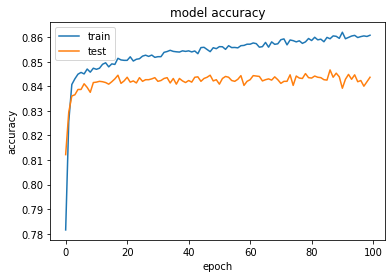

In [97]:
# summarize history for accuracy
plt.plot(history_model_adult.history['accuracy'])
plt.plot(history_model_adult.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

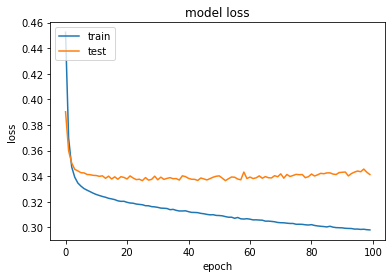

In [98]:
# summarize history for loss
plt.plot(history_model_adult.history['loss'])
plt.plot(history_model_adult.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [99]:
y_pred_keras_adult = model_adult.predict(X_test_adult).ravel()
fpr_keras_adult, tpr_keras_adult, thresholds_keras_adult = roc_curve(y_test_adult, y_pred_keras_adult)

189/189 [==============================] - 0s 1ms/step


In [100]:
auc_keras_adult = auc(fpr_keras_adult, tpr_keras_adult)

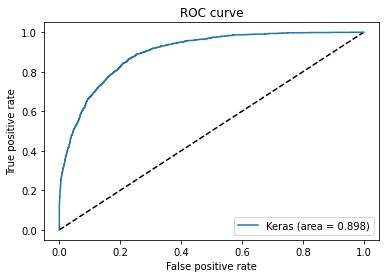

In [101]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras_adult, tpr_keras_adult, label='Keras (area = {:.3f})'.format(auc_keras_adult))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

#### train function

In [102]:
def train_adult(batch_size, lr, hidden_layers_sizes):

  model_adult = [keras.layers.Flatten(input_shape=(13,))]
  for hls in hidden_layers_sizes:
    model_adult.append(keras.layers.Dense(hls, activation='relu'))
  model_adult.append(keras.layers.Dense(1, activation='sigmoid'))
  model_adult = keras.Sequential(model_adult)
  opt_adult = keras.optimizers.Adam(learning_rate=lr)
  model_adult.compile(optimizer=opt_adult,
              loss='binary_crossentropy',
              metrics=['accuracy'])
  model_adult.fit(X_train_adult, y_train_adult, epochs=100, validation_data=(X_val_adult,y_val_adult), batch_size=batch_size, verbose=0, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])
  eval_results_adult = model_adult.evaluate(X_test_adult, y_test_adult, verbose=0)
  return eval_results_german

In [103]:
history_adult = {}

hlss_adult=[[16, 8], [16, 8, 4], [32, 8], [32, 16], [32, 16, 8]]
lrs_adult = [5e-2, 1e-3, 5e-4]
bss_adult = [50]

# with tqdm(total=len(hlss_adult)*len(lrs_adult)*len(bss_adult)) as pbar:
#   for hls in hlss_adult:
#     for lr in lrs_adult:
#       for bs in bss_adult:
#         history_adult[(bs, lr, tuple(hls))] = train_adult(bs, lr, hls)
#         pbar.update(1)

In [104]:
dict(sorted(history_adult.items(), key=lambda item: item[1][1], reverse=True))

{}

#### Our steps to find better model (FFNN adult):

+ epochs: We started experiments from increasing the amount of epochs and we observed that after a certain value the results are similar e.g. for 100 and 300 epochs the results were almost the same
+ batch size: a small value (e.g. 10) resulted in a significant prolongation in learning of the network even though it resulted in a negligible improvement in results, so we decided to train the network at a value of 50
+ learning rate: higher value (e.g. 0.05) in most cases results in worse results

We compared the results received with different optimizers like Adam, Nadam or SGD. They were similar in case of accuracy, but there was some difference in execution time. The best accuracy we got was from Adam and the best time of execution was from SGD.

Using the train function we got the following best results:

loss: 0.32664957642555237

accuracy 0.8481684327125549%

with parameters:
+ batch size: 50
+ learning rate: 0.001
+ 13 input neurons, 3 hidden layers with 32, 16, 8 neurons and 1 output neuron
+ optimizer: Adam

### SOM

In [105]:
X_train_som_adult, X_test_som_adult, y_train_som_adult, y_test_som_adult = train_test_split(X_adult, y_adult, train_size=0.6, random_state=31)

In [106]:
def classify_adult(som, data):
    winmap = som.labels_map(X_train_som_adult, y_train_som_adult)
    default_class = np.sum(list(winmap.values())).most_common()[0][0]
    result = []
    for d in data:
        win_position = som.winner(d)
        if win_position in winmap:
            result.append(winmap[win_position].most_common()[0][0])
        else:
            result.append(default_class)
    return result

In [107]:
som_adult = MiniSom(20, 20, 13, learning_rate=0.001, sigma = 4,
              neighborhood_function='triangle', activation_distance='euclidean', topology='rectangular', random_seed=42)
som_adult.random_weights_init(X_train_som_adult)
som_adult.train_batch(X_adult, 3000, verbose=True)

 [ 3000 / 3000 ] 100% - 0:00:00 left 
 quantization error: 1.673229466600068


In [108]:
print(classification_report(y_test_som_adult, classify_adult(som_adult, X_test_som_adult)))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      9080
           1       0.66      0.47      0.55      2985

    accuracy                           0.81     12065
   macro avg       0.75      0.70      0.72     12065
weighted avg       0.80      0.81      0.80     12065



#### Training SOM

In [109]:
def train_som_adult(sigma, lr, ng_func, act_dist, topology, weight_init, train_init, epochs):
  som_adult = MiniSom(15, 15, 13, learning_rate=lr, 
              neighborhood_function=ng_func, activation_distance=act_dist, topology=topology, random_seed=42)
  if weight_init == 1:
    som_adult.random_weights_init(X_train_som_adult)
  else:
    som_adult.pca_weights_init(X_train_som_adult)

  if train_init == 1:
    som_adult.train_random(X_train_som_adult, epochs)
  else:
    som_adult.train_batch(X_train_som_adult, epochs)

  clas_rep_adult = classification_report(y_test_som_adult, classify_adult(som_adult, X_test_som_adult), output_dict=True)
  return clas_rep_adult

In [110]:
history_adult = {}

sigmas_adult = [2, 3, 4, 5]
lrs_adult = [5e-2, 1e-3, 5e-4]
epochs_adult = [2000, 3000]
ng_funs_adult = ['gaussian', 'triangle', 'mexican_hat', 'bubble']
activation_distances_adult = ['euclidean', 'cosine', 'manhattan', 'chebyshev']
topologys_adult = ['rectangular', 'hexagonal']
weights_init_adult = [1, 2] # 1 = random_weights_init ; 2 = pca_weights_init
trains_init_adult = [1, 2] # 1 = train_random ; 2 = train_batch



# with tqdm(total=len(sigmas_adult)*len(lrs_adult)*len(ng_funs_adult)*len(activation_distances_adult)*len(topologys_adult)*len(weights_init_adult)*len(epochs_adult)*len(trains_init_adult)) as pbar:
#   for epoch in epochs_adult:
#     for train_init in trains_init_adult:
#       for weight_init in weights_init_adult:
#         for sigma in sigmas_adult:
#           for lr in lrs_adult:
#             for ng_fun in ng_funs_adult:
#               for act_dist in activation_distances_adult:
#                 for topology in topologys_adult:
#                   history_adult[(topology, act_dist, ng_fun, lr, sigma, weight_init, train_init, epoch)] = train_som_adult(sigma, lr, ng_fun, act_dist, topology, weight_init, train_init, epoch)
#                   pbar.update(1)

In [111]:
items_adult = list(history_adult.items())
values_adult = list(history_adult.values())
total_adult = {}

In [112]:
sorted_som_adult = list(sorted(items_adult, key=lambda item: item[1]['accuracy'], reverse=True))

In [113]:
# from google.colab import files
# uploaded = files.upload()

In [114]:
# with open(r'sorted_som.txt', 'w') as fp:
#     for item in sorted_som_adult:
#         fp.write(f'{item}')
#     print('Done')

In [115]:
# sorted_som_adult[0]

In [116]:
# sorted_som_adult[10]

####Our Steps to find better model (SOM adult)

+ epochs: higher values usually give better results

+ sigma: we experimented with values of 3 and 4, and saw that the value of 3 gives better results than 4

+ learning rate: usually the higher the value is, the more accurate the result is


Using the train function we got the following best results:

accuracy: 0.8205553253211769%

with parameters:

+ sigma: 3
+ learning rate: 0.05
+ epochs: 2000
+ ng_func: bubble
+ activation distance: manhattan
+ topology: rectangular
+ weight init: random_weights_init
+ train init: train_random


#<font color='#6AA84F'>Section G (Summary)</font>

## Datasets comparison for both NN.

Firstly, we decided to compare both datasets for feedforward neural network.
As we can see below ROC for **adult** dataset is more smooth, we think it is because **german** dataset has only 1000 records inside in comparison to ~30000 in **adult**.

As we can observe - **adult** dataset has better results about 10%.

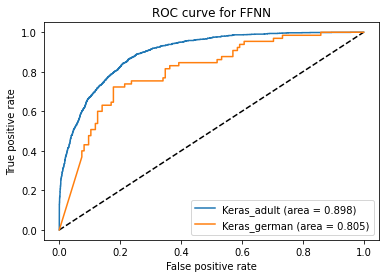

In [117]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras_adult, tpr_keras_adult, label='Keras_adult (area = {:.3f})'.format(auc_keras_adult))
plt.plot(fpr_keras_german, tpr_keras_german, label='Keras_german (area = {:.3f})'.format(auc_keras_german))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for FFNN')
plt.legend(loc='best')
plt.show()

Secondly, we compared results for **Self Organizing Map** to both datasets. As we can see **SOM** gave us similar results for datasets: **adult** dateset performed better than **german** by ~10%. It results from the same reasons as above. 

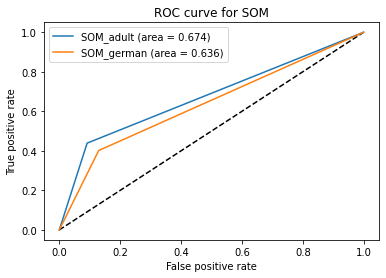

In [118]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_som_adult, tpr_som_adult, label='SOM_adult (area = {:.3f})'.format(auc_som_adult))
plt.plot(fpr_som_german, tpr_som_german, label='SOM_german (area = {:.3f})'.format(auc_som_german))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for SOM')
plt.legend(loc='best')
plt.show()

In a conclusion we found out that SOM requires a sufficient amount of data for generating meaningful clusters as insufficient or extraneous data might add additional randomness to the clusters. That's why we have difference between datasets.

## Neural netwoks comparison for both datasets.

As we can see below FFNN has learned better than SOM with the difference of 0.2.

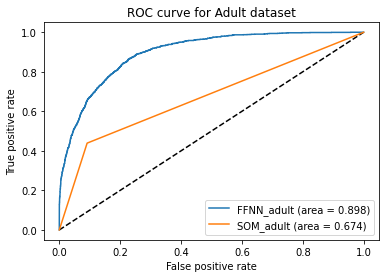

In [119]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras_adult, tpr_keras_adult, label='FFNN_adult (area = {:.3f})'.format(auc_keras_adult))
plt.plot(fpr_som_adult, tpr_som_adult, label='SOM_adult (area = {:.3f})'.format(auc_som_adult))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Adult dataset')
plt.legend(loc='best')
plt.show()

Below we can see results for **german** dataset. SOM performed worse than FFNN by the same 0.2.

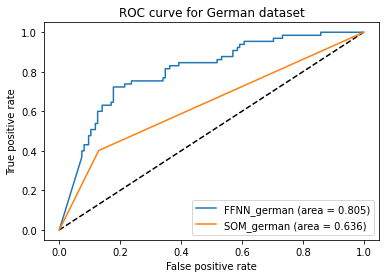

In [120]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras_german, tpr_keras_german, label='FFNN_german (area = {:.3f})'.format(auc_keras_german))
plt.plot(fpr_som_german, tpr_som_german, label='SOM_german (area = {:.3f})'.format(auc_som_german))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for German dataset')
plt.legend(loc='best')
plt.show()

In a conclusion we understood that Self-Organizing Maps is not used for binary classification. Also SOM doesn't perform well working with categorical data and even worse for mixed types of data. So feedforward is a better choice for our datasets.

Feed forward in turn, gives us much more freedom in the configuration. For example we can set up different variations of hidden layers, which we don't have in SOM, or define an activation function.

One more thing need to be mentioned is that our dataset has different proportion of result data about 70/30. The fact that **result** parameter is not averaged, also affected on the learning of our network and our classification is not very accurate.